In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data file and printing top 5 rows

df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [4]:
# Printing number of observations and features

df.shape

(19735, 29)

There are 19735 rows(observations) and 29 columns(features)

In [5]:
# Printing basic information of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

On inspection of the Data Frame information:
1. There are no columns with missing (Null) values
2. All numeric columns are correctly identified as either float or int
3. Date column is identified as Object and need to be converted to datetime data type

Description of the variable columns are listed below (from the source website)

# Variable Description
====================

1. **date** time year-month-day hour:minute:second 
2. **Appliances**, energy use in Wh
3. **lights**, energy use of light fixtures in the house in Wh
4. **T1**, Temperature in kitchen area, in Celsius
5. **RH_1**, Humidity in kitchen area, in %
6. **T2**, Temperature in living room area, in Celsius
7. **RH_2**, Humidity in living room area, in %
8. **T3**, Temperature in laundry room area
9. **RH_3**, Humidity in laundry room area, in %
10. **T4**, Temperature in office room, in Celsius
11. **RH_4**, Humidity in office room, in %
12. **T5**, Temperature in bathroom, in Celsius
13. **RH_5**, Humidity in bathroom, in %
14. **T6**, Temperature outside the building (north side), in Celsius
15. **RH_6**, Humidity outside the building (north side), in %
16. **T7**, Temperature in ironing room , in Celsius
17. **RH_7**, Humidity in ironing room, in %
18. **T8**, Temperature in teenager room 2, in Celsius
19. **RH_8**, Humidity in teenager room 2, in %
20. **T9**, Temperature in parents room, in Celsius
21. **RH_9**, Humidity in parents room, in %
22. **T_out**, Temperature outside (from Chièvres weather station), in Celsius
23. **Press_mm_hg** (from Chièvres weather station), in mm Hg
24. **RH_out**, Humidity outside (from Chièvres weather station), in %
25. **Windspeed** (from Chièvres weather station), in m/s
26. **Visibility** (from Chièvres weather station), in km
27. **Tdewpoint** (from Chièvres weather station), °C
28. **rv1**, Random variable 1, nondimensional
29. **rv2**, Rnadom variable 2, nondimensional

In [6]:
# Converting date to datetime

df.date = pd.to_datetime(df.date)

In [7]:
# Drop random variables as they are not used for prediction

df.drop(['rv1', 'rv2'], axis=1, inplace=True)

## Data Exploration

Text(0, 0.5, 'Energy use in Wh')

<Figure size 432x288 with 0 Axes>

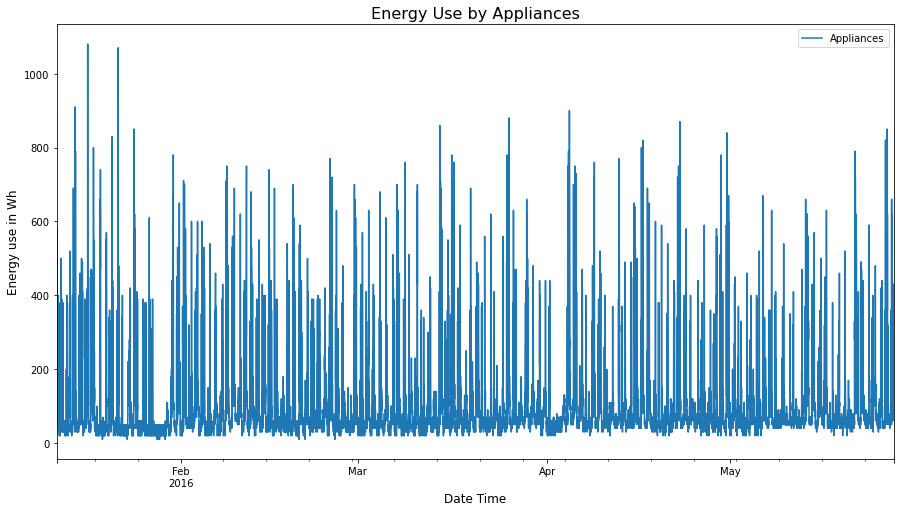

In [8]:
# Basic exploration of the energy use of appliances by plotting over the provided data duration

fig = plt.figure()
df.plot(x = 'date', y = 'Appliances', figsize = (15,8))
plt.title('Energy Use by Appliances', size=16)
plt.xlabel('Date Time', size=12)
plt.ylabel('Energy use in Wh', size=12)

<AxesSubplot:>

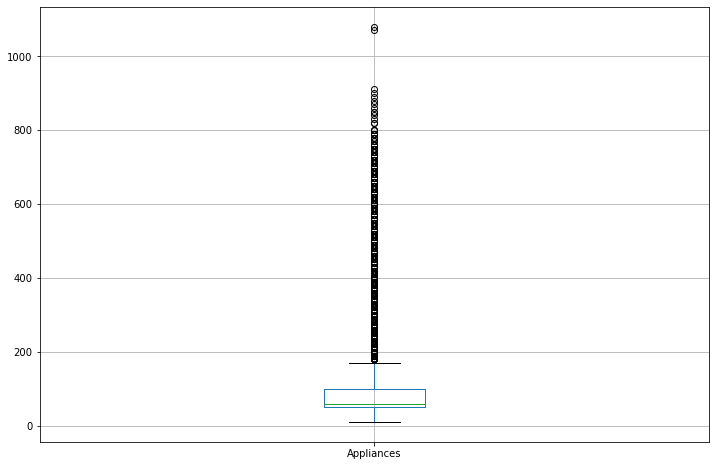

In [9]:
# Boxplot of energy use by appliances

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(column='Appliances')
#ax.set_yscale('log')

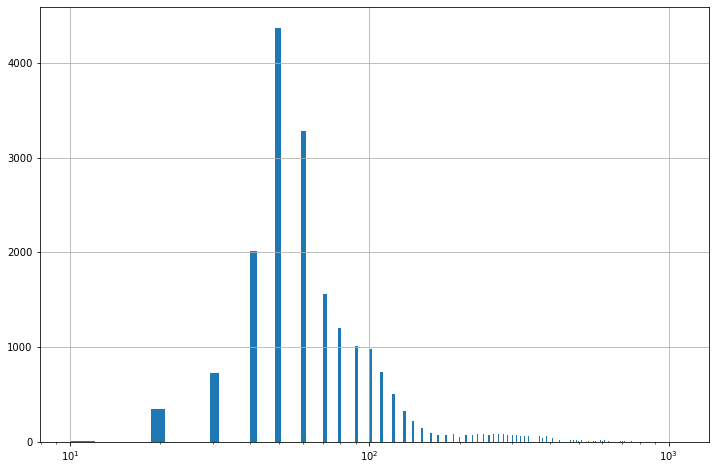

In [10]:
fig, ax = plt.subplots(figsize = (12,8))
df.Appliances.hist(bins=500)
ax.set_xscale('log')

c:\Users\ajayd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

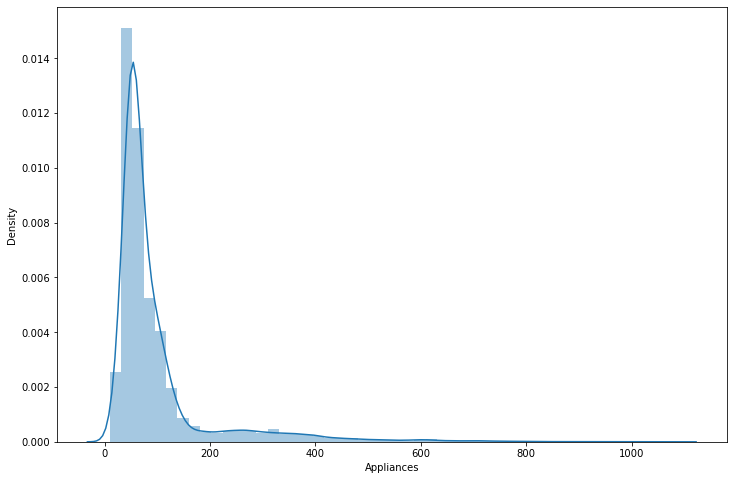

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(df['Appliances'])
#ax.set_xscale('log')

c:\Users\ajayd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


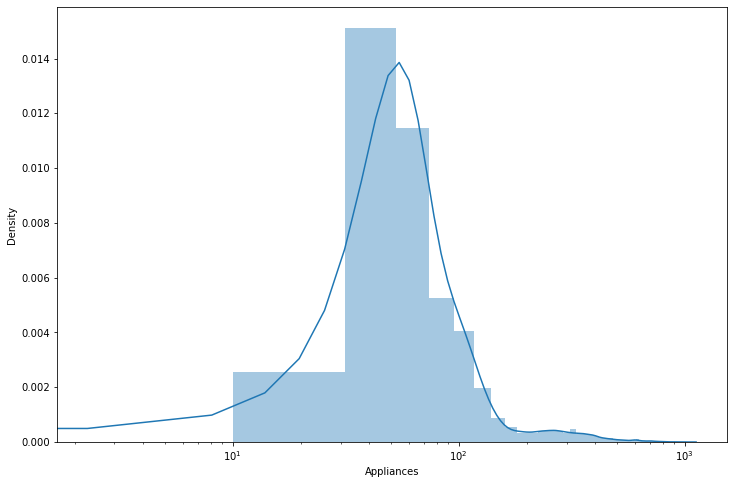

In [12]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(df['Appliances'])
ax.set_xscale('log')

### Observations
1. Energy use does not seem to have any specific pattern
2. Energy use by appliances is right skewed and looks like a log distribution
3. Changing the x-axis to log scale makes the distribution close to normal
4. Transforming the energy use to log energy use can help with prediction accuracy

Text(0, 0.5, 'Energy use in Wh')

<Figure size 432x288 with 0 Axes>

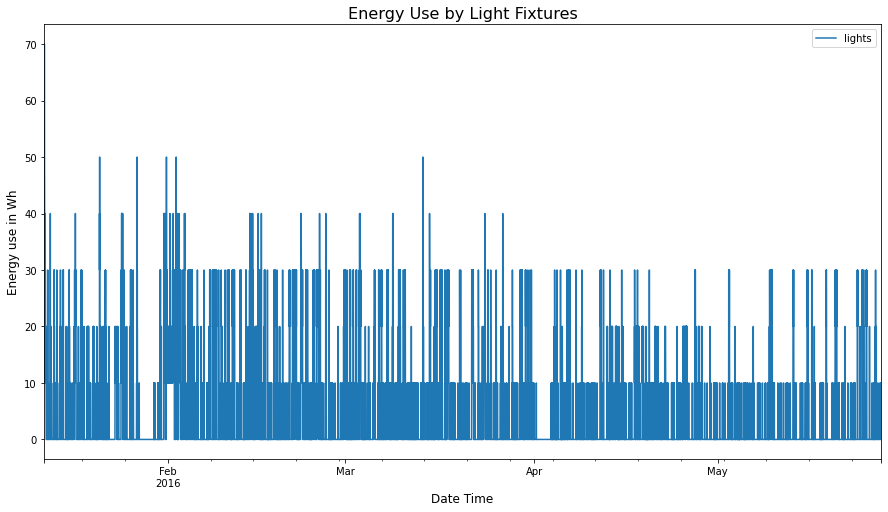

In [13]:
# Basic exploration of the energy use of light fixtures by plotting over the provided data duration

fig = plt.figure()
df.plot(x = 'date', y = 'lights', figsize = (15,8))
plt.title('Energy Use by Light Fixtures', size=16)
plt.xlabel('Date Time', size=12)
plt.ylabel('Energy use in Wh', size=12)

In [14]:
df['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

### Observations
1. Light fixture energy use is significantly less than energy use by Appliances. Most values are 0
2. For prediction, we will only consider energy use by Appliances

In [15]:
# Summary statistics of the numeric columns in the data

round(df.describe().T, 1)

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.7,102.5,10.0,50.0,60.0,100.0,1080.0
lights,19735.0,3.8,7.9,0.0,0.0,0.0,0.0,70.0
T1,19735.0,21.7,1.6,16.8,20.8,21.6,22.6,26.3
RH_1,19735.0,40.3,4.0,27.0,37.3,39.7,43.1,63.4
T2,19735.0,20.3,2.2,16.1,18.8,20.0,21.5,29.9
RH_2,19735.0,40.4,4.1,20.5,37.9,40.5,43.3,56.0
T3,19735.0,22.3,2.0,17.2,20.8,22.1,23.3,29.2
RH_3,19735.0,39.2,3.3,28.8,36.9,38.5,41.8,50.2
T4,19735.0,20.9,2.0,15.1,19.5,20.7,22.1,26.2
RH_4,19735.0,39.0,4.3,27.7,35.5,38.4,42.2,51.1


In [16]:
# Defining Temperature and Humidity columns

Temp = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']
Hum = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']

Text(0.5, 1.0, 'Box-plot for Temperatures')

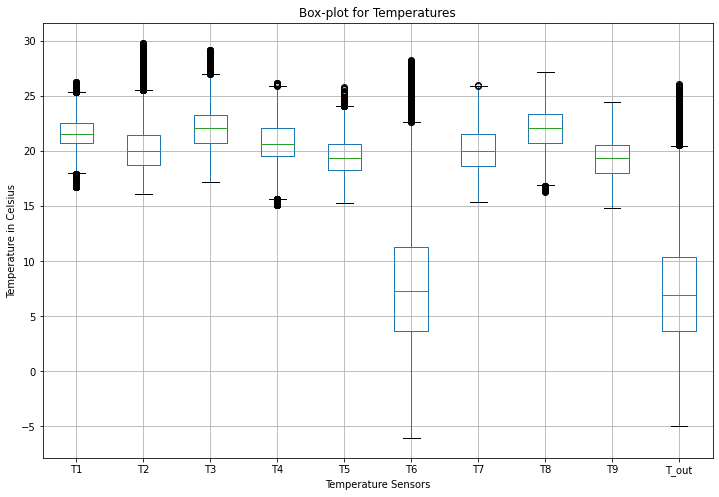

In [17]:
# Boxplots for Temperatures
fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(column=Temp)
plt.xlabel('Temperature Sensors')
plt.ylabel('Temperature in Celsius')
plt.title('Box-plot for Temperatures')

Text(0.5, 1.0, 'Box-plot for Humidity')

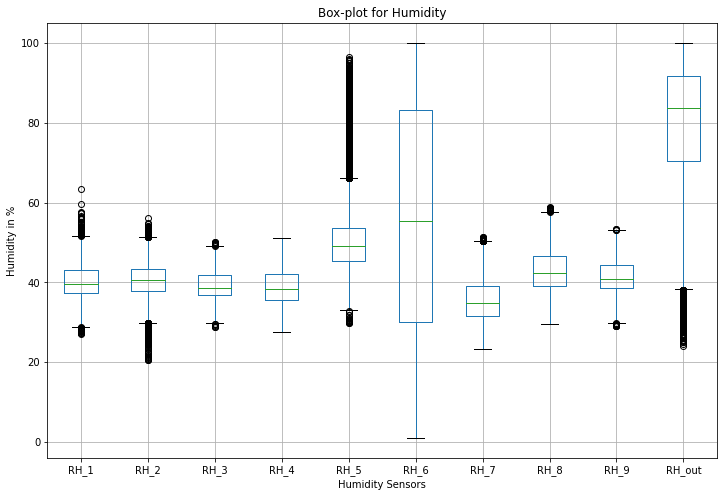

In [18]:
# Boxplots for Humidity
fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(column=Hum)
plt.xlabel('Humidity Sensors')
plt.ylabel('Humidity in %')
plt.title('Box-plot for Humidity')

Text(0.5, 1.0, 'Box-plot for Pressure')

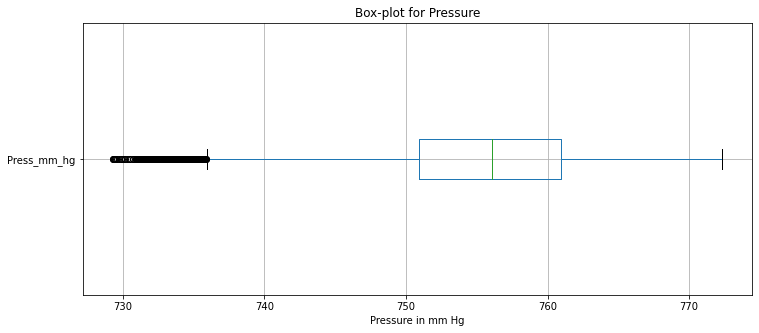

In [19]:
# Boxplots for Pressure
fig, ax = plt.subplots(figsize = (12,5))
df.boxplot(column='Press_mm_hg', vert=False)
plt.xlabel('Pressure in mm Hg')
plt.title('Box-plot for Pressure')

Text(0.5, 1.0, 'Box-plot for Wind Speed')

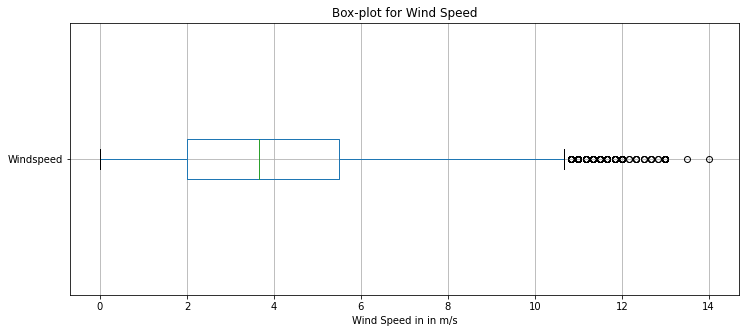

In [20]:
# Boxplots for Wind Speed
fig, ax = plt.subplots(figsize = (12,5))
df.boxplot(column='Windspeed', vert=False)
plt.xlabel('Wind Speed in in m/s')
plt.title('Box-plot for Wind Speed')

Text(0.5, 1.0, 'Box-plot for Visibility')

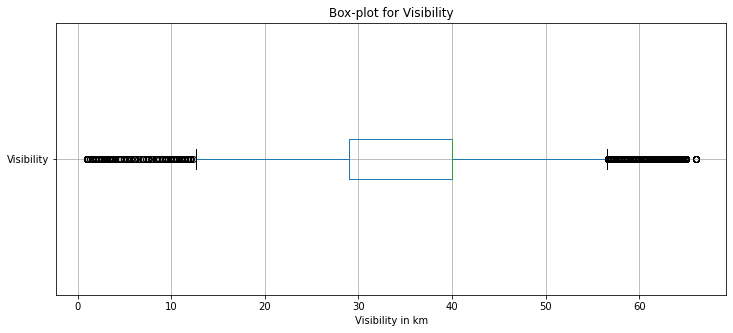

In [21]:
# Boxplots for Visibility
fig, ax = plt.subplots(figsize = (12,5))
df.boxplot(column='Visibility', vert=False)
plt.xlabel('Visibility in km')
plt.title('Box-plot for Visibility')

Text(0.5, 1.0, 'Box-plot for Tdewpoint')

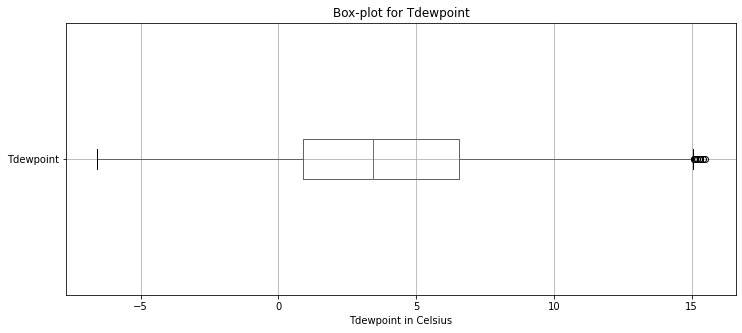

In [22]:
# Boxplots for Tdewpoint
fig, ax = plt.subplots(figsize = (12,5))
df.boxplot(column='Tdewpoint', vert=False)
plt.xlabel('Tdewpoint in Celsius')
plt.title('Box-plot for Tdewpoint')

### Observations
1. All temperatures inside the house are within similar range (15 to 30 degrees celsius)
2. Both outside temperatures are within similar range of (-5 to 30 degrees celsius)
3. Difference between inside and outside temperature can be used as a feature
4. RH_6 (Building outside) humidity distribution is different than that of RH_out (weather station)
5. Difference of humidity between inside and outside can be used as a feature
6. Pressure, WindSpeed, Visibility and Tdewpoint can be used as features after normalization

## Correlation Analysis

Perform correlation analysis between the numerical variables to:
1. Identify if any independent variable is highly correlated with energy use
2. If any independent variables that are highly correlated can be combined to reduce the number of features

In [23]:
# Overall correlation between all numeric features

corr = df.iloc[:,1:].corr()
round(corr,2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.00,0.20,0.06,0.09,0.12,-0.06,0.09,0.04,0.04,0.02,...,0.04,-0.09,0.01,-0.05,0.10,-0.03,-0.15,0.09,0.00,0.02
lights,0.20,1.00,-0.02,0.11,-0.01,0.05,-0.10,0.13,-0.01,0.11,...,-0.07,0.01,-0.16,-0.01,-0.07,-0.01,0.07,0.06,0.02,-0.04
T1,0.06,-0.02,1.00,0.16,0.84,-0.00,0.89,-0.03,0.88,0.10,...,0.83,-0.01,0.84,0.07,0.68,-0.15,-0.35,-0.09,-0.08,0.57
RH_1,0.09,0.11,0.16,1.00,0.27,0.80,0.25,0.84,0.11,0.88,...,-0.03,0.74,0.12,0.76,0.34,-0.29,0.27,0.20,-0.02,0.64
T2,0.12,-0.01,0.84,0.27,1.00,-0.17,0.74,0.12,0.76,0.23,...,0.58,0.07,0.68,0.16,0.79,-0.13,-0.51,0.05,-0.07,0.58
RH_2,-0.06,0.05,-0.00,0.80,-0.17,1.00,0.14,0.68,-0.05,0.72,...,-0.04,0.68,0.05,0.68,0.03,-0.26,0.58,0.07,-0.01,0.50
T3,0.09,-0.10,0.89,0.25,0.74,0.14,1.00,-0.01,0.85,0.12,...,0.80,0.04,0.90,0.13,0.70,-0.19,-0.28,-0.10,-0.10,0.65
RH_3,0.04,0.13,-0.03,0.84,0.12,0.68,-0.01,1.00,-0.14,0.90,...,-0.28,0.83,-0.20,0.83,0.12,-0.23,0.36,0.26,0.02,0.41
T4,0.04,-0.01,0.88,0.11,0.76,-0.05,0.85,-0.14,1.00,-0.05,...,0.80,-0.10,0.89,-0.03,0.66,-0.08,-0.39,-0.19,-0.10,0.52
RH_4,0.02,0.11,0.10,0.88,0.23,0.72,0.12,0.90,-0.05,1.00,...,-0.17,0.85,-0.04,0.86,0.29,-0.25,0.34,0.30,0.00,0.62


Text(0.5, 1.0, 'Correlation Matrix')

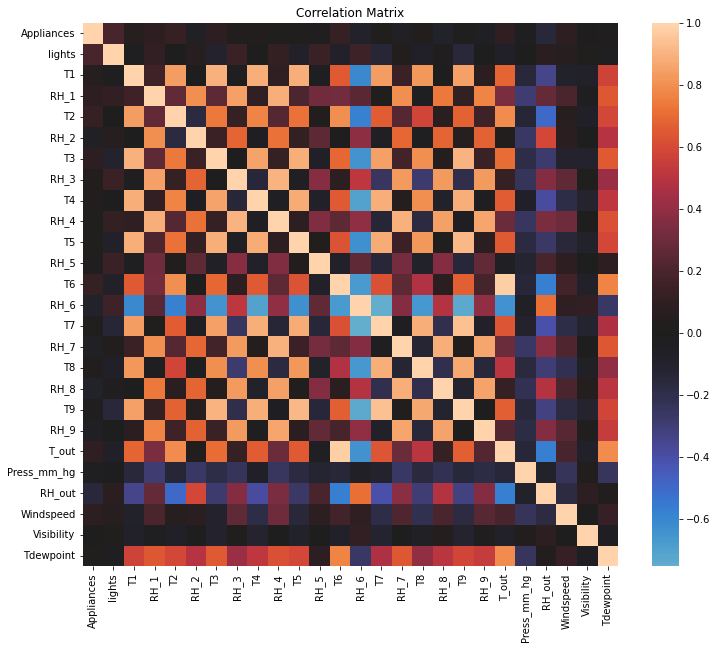

In [24]:
# Plotting the correlation matrix

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.heatmap(ax=ax, data=corr, center=0)
plt.title('Correlation Matrix', size=12)

### Observations
1. Temperature sensor readings are highly correlated with each other
2. Humidity sensor readings are highly correlated with each other
3. Appliance energy use does not have high correlation with any variable
4. Energy use by appliances and lights have correlation close to zero with temperature and humidity

In [25]:
# Correlation between all temperature readings

corr_temp = df[Temp].corr()
round(corr_temp,2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out
T1,1.00,0.84,0.89,0.88,0.89,0.65,0.84,0.83,0.84,0.68
T2,0.84,1.00,0.74,0.76,0.72,0.80,0.66,0.58,0.68,0.79
T3,0.89,0.74,1.00,0.85,0.89,0.69,0.85,0.80,0.90,0.70
T4,0.88,0.76,0.85,1.00,0.87,0.65,0.88,0.80,0.89,0.66
T5,0.89,0.72,0.89,0.87,1.00,0.63,0.87,0.82,0.91,0.65
T6,0.65,0.80,0.69,0.65,0.63,1.00,0.62,0.48,0.67,0.97
T7,0.84,0.66,0.85,0.88,0.87,0.62,1.00,0.88,0.94,0.63
T8,0.83,0.58,0.80,0.80,0.82,0.48,0.88,1.00,0.87,0.50
T9,0.84,0.68,0.90,0.89,0.91,0.67,0.94,0.87,1.00,0.67
T_out,0.68,0.79,0.70,0.66,0.65,0.97,0.63,0.50,0.67,1.00


Text(0.5, 1.0, 'Correlation Matrix for Temperature')

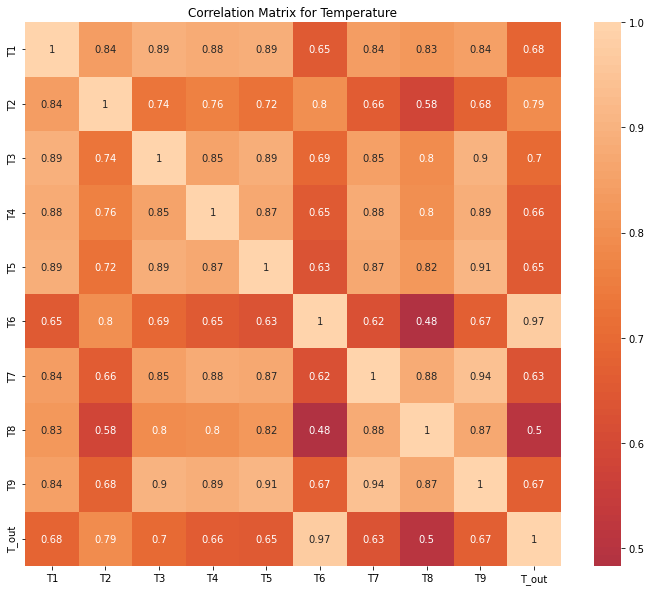

In [26]:
# Plotting the correlation matrix for temperature readings

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.heatmap(ax=ax, data=corr_temp, annot=True, center=0)
plt.title('Correlation Matrix for Temperature', size=12)

### Observations
1. Temperatures measured inside the house have high correlation with each other except T2, T6 and T_out.
2. These temperatures can be combined by taking average temperature
3. T6 (Building outside), T_out (weather station) have high correlation as both of them are outside temperatures and validates the readings
4. T2 (Living Room) is correlated with T6, T_out and T1 (Kitchen)

In [27]:
# Correlation between all humidity readings

corr_hum = df[Hum].corr()
round(corr_hum,2)

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
RH_1,1.00,0.80,0.84,0.88,0.30,0.25,0.80,0.74,0.76,0.27
RH_2,0.80,1.00,0.68,0.72,0.25,0.39,0.69,0.68,0.68,0.58
RH_3,0.84,0.68,1.00,0.90,0.38,0.51,0.83,0.83,0.83,0.36
RH_4,0.88,0.72,0.90,1.00,0.35,0.39,0.89,0.85,0.86,0.34
RH_5,0.30,0.25,0.38,0.35,1.00,0.26,0.33,0.36,0.27,0.19
RH_6,0.25,0.39,0.51,0.39,0.26,1.00,0.36,0.49,0.39,0.72
RH_7,0.80,0.69,0.83,0.89,0.33,0.36,1.00,0.88,0.86,0.38
RH_8,0.74,0.68,0.83,0.85,0.36,0.49,0.88,1.00,0.86,0.49
RH_9,0.76,0.68,0.83,0.86,0.27,0.39,0.86,0.86,1.00,0.36
RH_out,0.27,0.58,0.36,0.34,0.19,0.72,0.38,0.49,0.36,1.00


Text(0.5, 1.0, 'Correlation Matrix for Humidity')

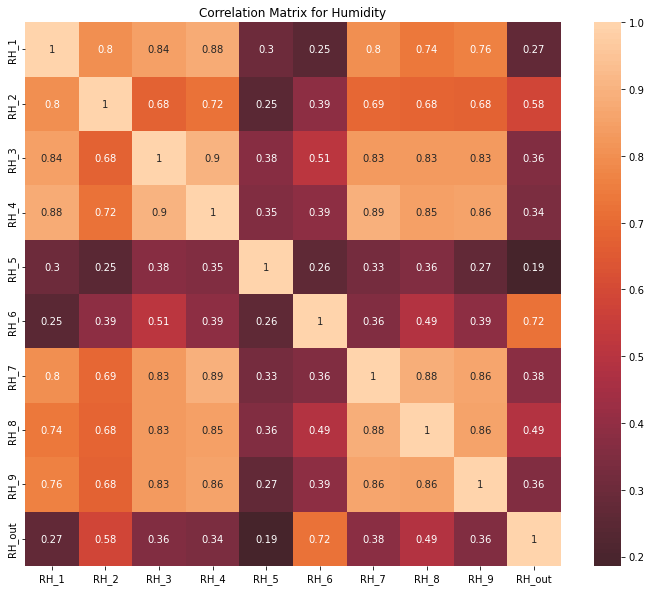

In [28]:
# Plotting the correlation matrix for humidity readings

fig, ax = plt.subplots(figsize = (12,10))
ax = sns.heatmap(ax=ax, data=corr_hum, annot=True, center=0)
plt.title('Correlation Matrix for Humidity', size=12)

### Observations
1. In general, the correlation between humidity sensors are lower compared to temperature sensors
2. Humidity measured inside the house have high correlation with each other except RH_2, RH_5, RH_6 and T_out.
3. These humidity readings can be combined by taking average humidity
4. RH_6 (Building outside), RH_out (weather station) have relatively high correlation as both of them are outside humidity and validates the readings
5. RH_2 (Living Room) has high correlation with RH_2 (Kitchen), suggesting they share common space
6. RH_5 (Bathroom) does not have any correlation with other humidity sensors and has high humidity in general

<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

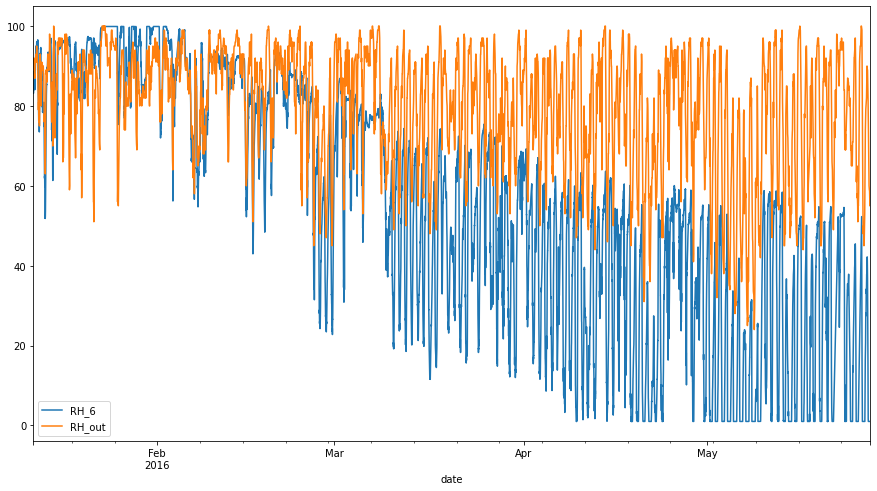

In [29]:
# Investigation of difference between RH_6 (Building Outside) and RH_out (weather station)

fig = plt.figure()
df.plot(x = 'date', y = ['RH_6', 'RH_out'], figsize = (15,8))

Looks like sensor measuring humidity outside the building had a malfunction in mid-february and the readings have been drifting down. That makes it unusable and will be removed from the analysis

<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

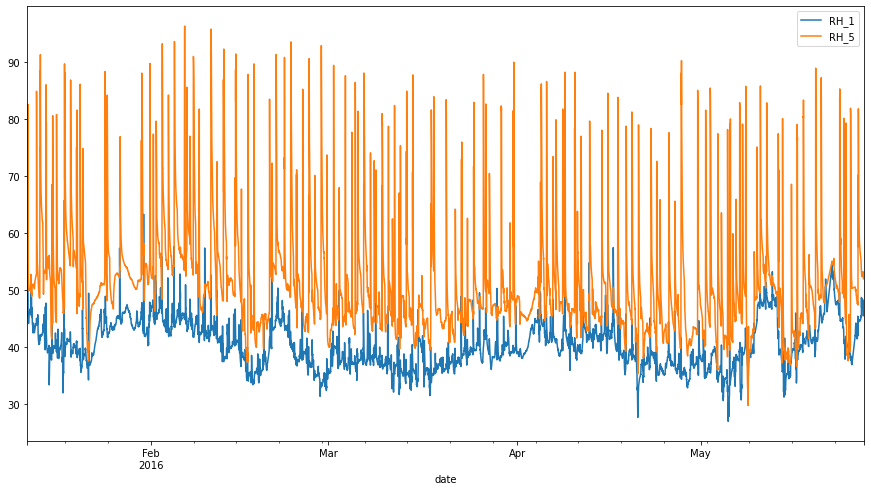

In [30]:
# Investigation of humidity reading of RH_5 (Bathroom) against RH_1 (Kitchen)

fig = plt.figure()
df.plot(x = 'date', y = ['RH_1','RH_5'], figsize = (15,8))

As expected, humidity in the bathroom (RH_5) is generally high and has high spikes (possibly during showers)

## Feature Engineering
Creating new features and other data transformation to prepare features for machine learning algorithms

### Creating Hour, Weekday and Month from Date
Use the date column to extract hour of day, day of the week and month to use any hourly, weekly and monthly patterns

In [31]:
# Extracting hour of day from date

df['hour'] = df.date.dt.hour

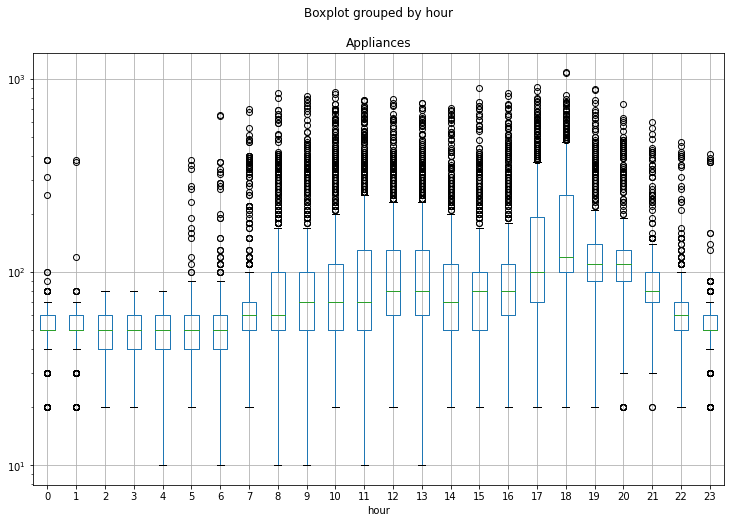

In [32]:
# Plotting appliance energy (log) use distribution by hour

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='Appliances', by='hour')
ax.set_yscale('log')

<AxesSubplot:title={'center':'lights'}, xlabel='hour'>

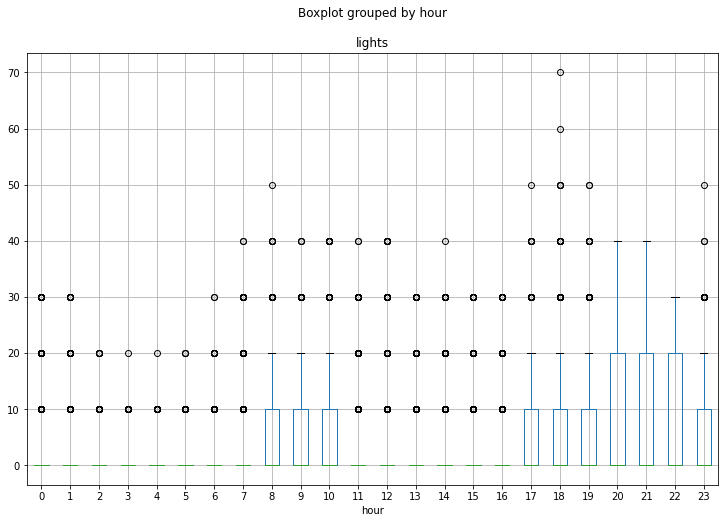

In [33]:
# Plotting light energy use distribution by hour

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='lights', by='hour')

In [34]:
# Extracting Day of Week from date

df['weekday'] = df.date.dt.dayofweek

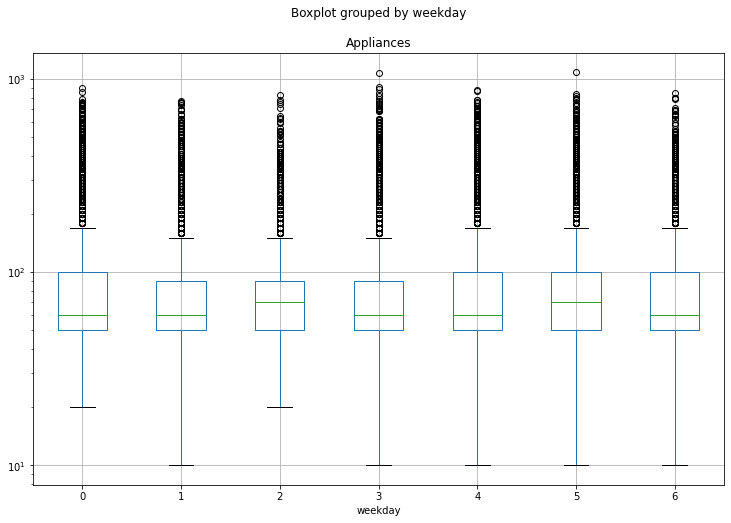

In [35]:
# Plotting appliance energy (log) use distribution by day of week

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='Appliances', by='weekday')
ax.set_yscale('log')

In [36]:
# Extracting month from date

df['month'] = df.date.dt.month

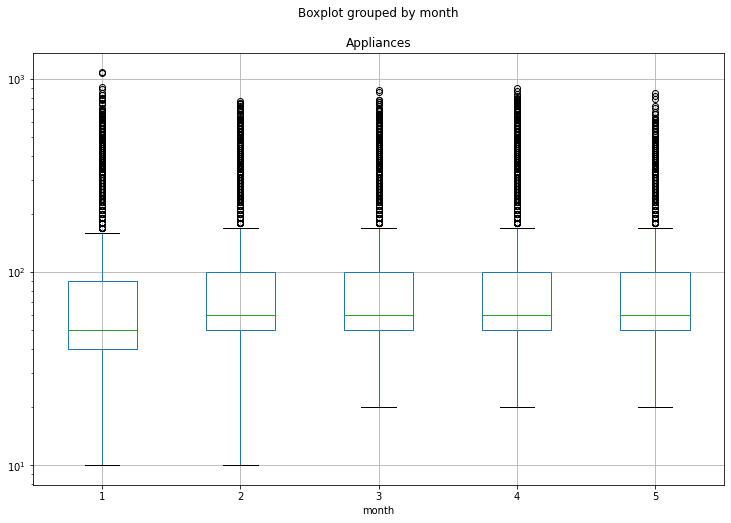

In [37]:
# Plotting appliance energy (log) use distribution by month

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='Appliances', by='month')
ax.set_yscale('log')

### Observations
1. Appliance energy use has a hourly pattern, with low use during late night and early morning. Peak use was around 5-6 PM.
2. Light energy use follows a predictable hourly pattern of most use during 8-10 AM and 5-11 PM.
3. Energy use by appliances by day of week and by month does not have any specific pattern

### Transforming existing features
1. Create Log of energy use by appliances
2. Create average of inside and outside temperatures that are highly correlated with each other
3. Create difference between inside and outside temperatures
4. Create average of inside and outside humidity that are highly correlated with each other
5. Create difference between inside and outside humidity
4. Create one hot encoding (using dummies) for categorical data of hour, weekday, and month 

In [38]:
# Calculating log of appliance energy use column

df['log_energy'] = np.log(df['Appliances'])

In [39]:
# Calculating average of inside Temperature and Humidity

Temp_in = ['T1','T3','T4','T5','T7','T8','T9']
Hum_in = ['RH_1','RH_3','RH_4','RH_7','RH_8','RH_9']

df['Temp_in'] = np.nanmean(df[Temp_in], axis=1)
df['Hum_in'] = np.nanmean(df[Hum_in], axis=1)

In [40]:
# Calculating difference between inside and outside temperature and humidity

df['Temp_diff'] = np.abs(df['T_out'] - df['Temp_in'])
df['Hum_diff'] = np.abs(df['RH_out'] - df['Hum_in'])

In [41]:
# Selecting X and Y columns before creating dummies

#X_cols = ['Temp_in', 'Hum_in', 'T_out', 'RH_out', 'Temp_diff', 'Hum_diff',
#          'T2', 'T6', 'RH_2', 'RH_5', 'Press_mm_hg', 'Windspeed','Visibility', 'Tdewpoint',
#          'hour', 'weekday', 'month']
X_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
          'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'hour',
          'Temp_in', 'Hum_in', 'Temp_diff', 'Hum_diff', 'weekday', 'month']
y_col = ['log_energy']

X = df[X_cols]
y = df[y_col]

In [42]:
# Creating one-hot encoding for hour, dayofweek and month using dummies. 
# Removed weekday and month after checking feature importances from Extra Tree Regression Model

X = pd.concat([X, pd.get_dummies(df.hour, prefix='h')], axis=1)
#X = pd.concat([X, pd.get_dummies(df.weekday, prefix='w')], axis=1)
#X = pd.concat([X, pd.get_dummies(df.month, prefix='m')], axis=1)

In [43]:
# Dropping hour, weekday and month columns

X = X.drop(['hour', 'weekday', 'month'], axis=1)

In [44]:
# Dropping h_0 to h_16 and h_21 to h_23 after checking feature importances from Extra Tree Regression Model 

X = X.drop(['h_0','h_1', 'h_2', 'h_3','h_4','h_5','h_6','h_7','h_8','h_9','h_10',
            'h_11','h_12','h_13','h_14','h_15','h_16','h_21','h_22','h_23'], axis=1)

## Developing Machine Learning Model

Predicting energy use by appliances using the available features using the following steps:
1. Split the data into training and testing data sets
2. Scale the data using Min-Max scaler because it preserves the one-hot encoding
3. Transforming the Train and Test data using the scaler
4. Making the y values 1 dimentional numpy arrays to be used in models
5. Use available regression models in scikit-learn
6. Pick best performing model (Extra Trees Regressor)
7. Use the feature importance method to select the final features to use
8. Re-run the models with the reduced features
9. Perform hyper parameter tuning of best performing model using Grid Search CV
10. Use the hyper parameters from Grid Search to define the final model

In [45]:
# Creating Training and Test data split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
# Creating the Min-Max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [47]:
# Transforming Train and Test features using min-max scaler

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Making y values numpy 1-dimentional arrays

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

### Using Liner Regression Models
1. Using Linear Regression
2. Using Ridge Regression
3. Using Lasso Regression

In [49]:
# Import linear models

from sklearn import linear_model

In [50]:
# Simple linear regression

lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.2820475660996429

In [51]:
# Ridge regression

ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.280862936637302

In [52]:
# Lasso Regression

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

-7.24825647790972e-06

### Using Support Vector Machine Regression Model

In [53]:
# Importing support vector machine

from sklearn import svm

In [54]:
# Support Vector Machine regression

svr = svm.SVR(gamma='scale')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.4075825434461475

### Using Decision Tree Regression Model

In [55]:
# Importing Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [56]:
# Iterating and using max_depth to improve score

tree = DecisionTreeRegressor(max_depth= 40, random_state=42)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.4404979926094572

### Using Decision Tree Ensemble Models
1. Gradient Boost Regression
2. Ada Boost Regression
3. Extra Trees Regression
4. Random Forest Regression
5. Bagging Regression

In [57]:
# Importing decision tree ensemble regressors

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [58]:
# Using gradient boost regressor

gbr = GradientBoostingRegressor(max_depth= 30, random_state=42)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.5283898328596165

In [59]:
# Using Ada Boost regressor

abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30), n_estimators=200, random_state=42)
abr.fit(X_train, y_train)
abr.score(X_test, y_test)

0.6698960779097967

In [60]:
# Using Extra Trees regressor (Model of choice with highest score)

etr = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=30)
etr.fit(X_train, y_train)
etr.score(X_test, y_test)

0.7350687206908234

In [61]:
# Using Random Forest regressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.6964402240316399

In [62]:
# Using Bagging regressor

br = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20), n_estimators=200, random_state=42)
br.fit(X_train, y_train)
br.score(X_test, y_test)

0.6819758632728476

### Using Feature Importance to reduce features
Iterative process to reduce features for higher accuracy and prevent overfitting
1. Use all the features
2. Run feature importance and drop least performing features
3. Rerun the model with reduced features, check for accuracy and run feature importance
4. Iterate and finalize on select minimum features with reasonable accuracy

In [63]:
# Use feature importance method for Extra Trees Regressor

etr.feature_importances_

array([0.03031876, 0.03789881, 0.04346606, 0.02920812, 0.0405458 ,
       0.03639759, 0.0330203 , 0.02736756, 0.0295485 , 0.03321202,
       0.03195314, 0.02851861, 0.02708586, 0.02703641, 0.03765937,
       0.04298881, 0.02498293, 0.03026751, 0.02407341, 0.03387807,
       0.03711375, 0.03179722, 0.02232081, 0.02643092, 0.02512346,
       0.02497147, 0.02718229, 0.03572322, 0.02026024, 0.05001482,
       0.02800214, 0.02163201])

In [64]:
# Sort the list with descending importance

list(sorted(zip(etr.feature_importances_, X.columns), reverse=True))

[(0.05001482414345465, 'h_18'),
 (0.04346605877299534, 'T2'),
 (0.04298881015366809, 'RH_8'),
 (0.0405457987894021, 'T3'),
 (0.03789880730899488, 'RH_1'),
 (0.03765937250068737, 'T8'),
 (0.037113753514352955, 'RH_out'),
 (0.03639759134489341, 'RH_3'),
 (0.03572322370610541, 'Hum_diff'),
 (0.03387807152652919, 'Press_mm_hg'),
 (0.033212024028723364, 'RH_5'),
 (0.0330202994885104, 'T4'),
 (0.03195314094196035, 'T6'),
 (0.031797223415196536, 'Windspeed'),
 (0.03031875842784041, 'T1'),
 (0.030267507529952775, 'RH_9'),
 (0.029548501347711458, 'T5'),
 (0.02920812340279351, 'RH_2'),
 (0.028518606201703368, 'RH_6'),
 (0.028002139557050748, 'h_19'),
 (0.027367563444494897, 'RH_4'),
 (0.02718228552946066, 'Temp_diff'),
 (0.027085857796472122, 'T7'),
 (0.027036410850652007, 'RH_7'),
 (0.026430918354904763, 'Tdewpoint'),
 (0.02512345862347674, 'Temp_in'),
 (0.02498293192447452, 'T9'),
 (0.024971472952446463, 'Hum_in'),
 (0.024073406920327035, 'T_out'),
 (0.022320806605438222, 'Visibility'),
 (0.02

### Use Grid Search to optimize hyperparameters

1. Run Grid search on multiple parameters
2. Find the best parameters
2. Fix some parameters and re-run grid search on the rest
3. Optimize the parameters for the final model

In [65]:
# Import Grid Search

from sklearn.model_selection import GridSearchCV

In [66]:
# Define parameters and values search grid to avoid overfitting

parameters = {'max_depth': [None, 20, 30, 40, 50]
              #'min_samples_split': [2, 20, 50], 
              #'min_samples_leaf': [1, 10, 20]
             }

In [67]:
# Define Grid Search function with parameter grid. Fit to training data

reg = GridSearchCV(etr, parameters, cv=5)
reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(max_depth=30, random_state=42),
             param_grid={'max_depth': [None, 20, 30, 40, 50]})

In [68]:
# Find out the best parameters from the Grid Search. Run next search based on results

reg.best_params_

{'max_depth': 30}

In [69]:
# Check the score using the best parameters and test data

reg.score(X_test, y_test)

0.7350687206908234

In [70]:
# Check for overfitting by calculating score using training data. Score = 1 is overfitting

reg.score(X_train, y_train)

0.9993480162193477